In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [12]:
choice = 0  #start from 0
devices = ['nfet_01v8_lvt', 'nfet_01v8', 'pfet_01v8_lvt', 'pfet_01v8']

# widths used for characterization and BSIM4 fringe cap parameters (fringe caps are not included in ngspice output)
w = np.array([5, 5, 5, 5])
cgdo_w = np.array([2.39289e-10, 2.44907e-10, 2e-11, 5.24893e-11])*1e-6

In [13]:
# read ngspice data
df_raw = pd.read_csv('./simulation/techsweep_'+devices[choice]+'.txt', sep='\s+')
par_names = df_raw.columns.to_list()
par_prefix = par_names[1].split('[')[0]

# remove extra headers in file body and unwanted columns
df_raw = df_raw[~df_raw['v-sweep'].str.contains('v-sweep')]
df = df_raw.drop(['v-sweep', 'v-sweep.1'], axis=1)
df = df.apply(pd.to_numeric).abs()

# rename columns for readability
df.columns = df.columns.str.removeprefix(par_prefix+'[')
df.columns = df.columns.str.removesuffix(']')
df

,capbd,capbs,cgg,gds,gm,gmbs,id,l,vth,b,d,g
0,2.820000e-15,2.820000e-15,1.619000e-15,6.077000e-11,0.000000,0.000000,0.000000,1.500000e-07,0.6197,0.0,0.0,0.000
1,2.820000e-15,2.820000e-15,1.621000e-15,1.156000e-10,0.000000,0.000000,0.000000,1.500000e-07,0.6197,0.0,0.0,0.025
2,2.820000e-15,2.820000e-15,1.628000e-15,2.200000e-10,0.000000,0.000000,0.000000,1.500000e-07,0.6197,0.0,0.0,0.050
3,2.820000e-15,2.820000e-15,1.641000e-15,4.186000e-10,0.000000,0.000000,0.000000,1.500000e-07,0.6197,0.0,0.0,0.075
4,2.820000e-15,2.820000e-15,1.659000e-15,7.963000e-10,0.000000,0.000000,0.000000,1.500000e-07,0.6197,0.0,0.0,0.100
...,...,...,...,...,...,...,...,...,...,...,...,...
255834,1.471000e-15,2.284000e-15,8.809000e-14,4.189000e-06,0.000412,0.000070,0.000276,3.000000e-06,0.5237,0.4,1.8,1.700
255835,1.471000e-15,2.284000e-15,8.817000e-14,4.362000e-06,0.000417,0.000072,0.000287,3.000000e-06,0.5237,0.4,1.8,1.725
255836,1.471000e-15,2.284000e-15,8.824000e-14,4.552000e-06,0.000422,0.000074,0.000297,3.000000e-06,0.5237,0.4,1.8,1.750
255837,1.471000e-15,2.284000e-15,8.832000e-14,4.760000e-06,0.000426,0.000076,0.000308,3.000000e-06,0.5237,0.4,1.8,1.775


In [14]:
# sweep variable vectors
l = np.unique(df['l'])/1e-6
l = np.round(l, 3)
vgs = np.unique(df['g'])
vds = np.unique(df['d'])
vsb = np.unique(df['b'])

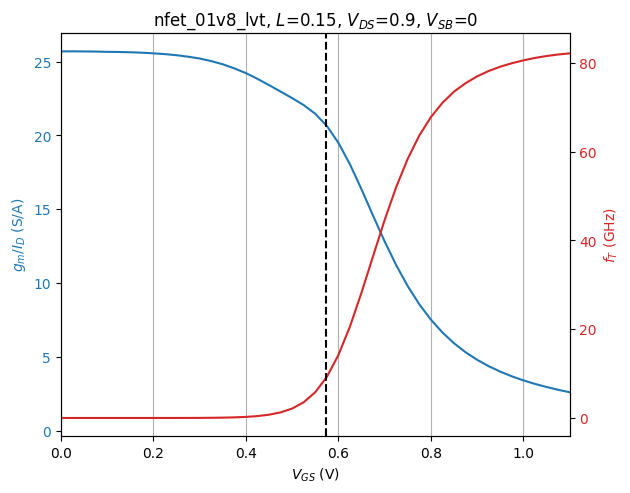

4.785779999999999e-16


In [21]:
# plot gm/ID and fT versus gate bias
L1 = min(l); VDS1=0.9; VSB1=0
df1 = df.loc[(df['l'] == L1*1e-6) & (df['d'] == VDS1) & (df['b'] == VSB1)]
gm_id1 = df1['gm'].values/df1['id'].values
cfringe = cgdo_w[choice]+cgdo_w[choice]
cggtot = df1['cgg'].values + 2*cfringe
ft1 = df1['gm'].values/cggtot/2/np.pi

fig, ax1 = plt.subplots()
ax1.grid(axis='x')
ax1.set_xlabel('$V_{GS}$ (V)')
color = 'tab:blue'
ax1.set_ylabel('$g_m/I_D$ (S/A)', color=color)
ax1.plot(vgs, gm_id1, color=color)
ax1.tick_params(axis='y', labelcolor=color)
ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('$f_T$ (GHz)', color=color)
ax2.plot(vgs, ft1/1e9, color=color)
ax2.tick_params(axis='y', labelcolor=color)
fig.tight_layout()
plt.title(devices[choice]+', $L$='+str(L1)+', $V_{DS}$='+str(VDS1)+', $V_{SB}$='+str(VSB1))
plt.xlim(0, 1.1)
plt.axvline(x = df1['vth'].values[0], color='k', linestyle='--')
plt.show()

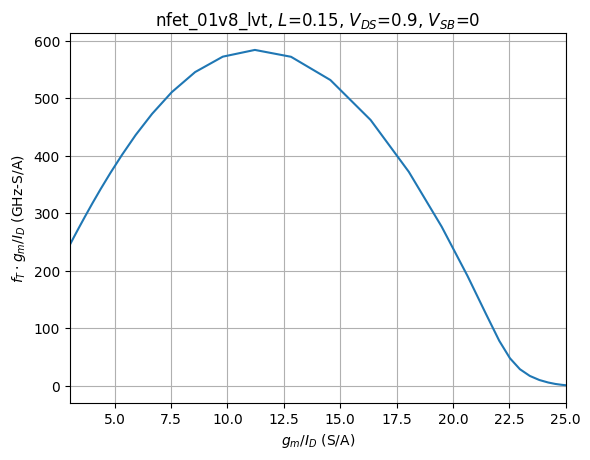

In [16]:
# plot product of gm/ID ant fT versus gm/ID
plt.plot(gm_id1, gm_id1*ft1/1e9)
plt.xlim(3, 25)
plt.xlabel('$g_m/I_D$ (S/A)')
plt.ylabel('$f_T\cdot g_m/I_D$ (GHz-S/A)')
plt.title(devices[choice]+', $L$='+str(L1)+', $V_{DS}$='+str(VDS1)+', $V_{SB}$='+str(VSB1))
plt.grid()
plt.show()

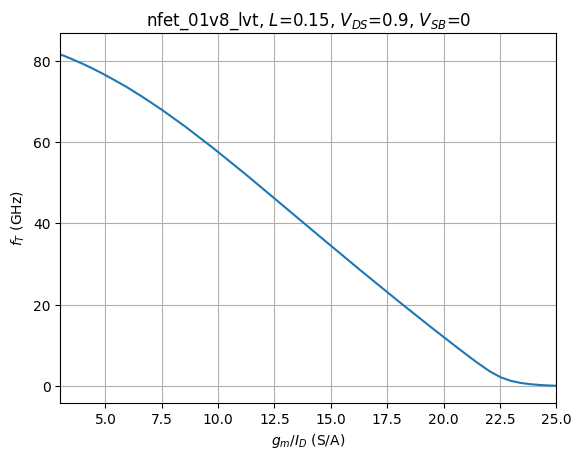

In [17]:
# plot fT versus gm/ID
plt.plot(gm_id1, ft1/1e9)
plt.xlim(3, 25)
plt.xlabel('$g_m/I_D$ (S/A)')
plt.ylabel('$f_T$ (GHz)')
plt.title(devices[choice]+', $L$='+str(L1)+', $V_{DS}$='+str(VDS1)+', $V_{SB}$='+str(VSB1))
plt.grid()
plt.show()

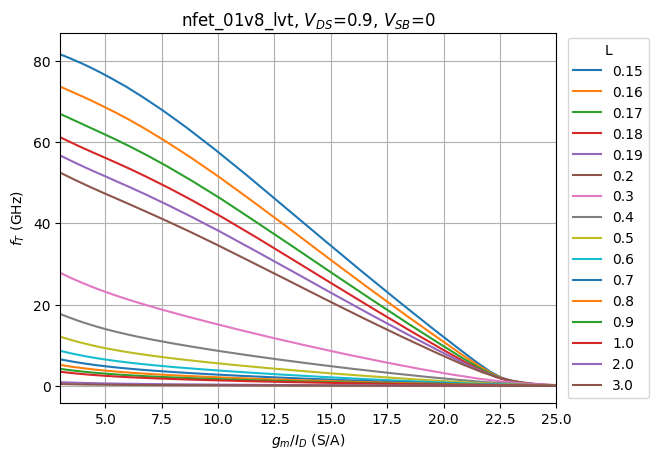

In [22]:
# plot fT versus gm/ID for all L
VDS2=0.9; VSB2=0
df2 = df.loc[(df['d'] == VDS2) & (df['b'] == VSB2)]
gm_id2 = df2['gm'].values/df2['id'].values
gm_id2 = np.reshape(gm_id2, (len(vgs), -1), order='F')
ft2 = df2['gm'].values/(df2['cgg'].values+2*cfringe)/2/np.pi
ft2 = np.reshape(ft2, (len(vgs), -1), order='F')

fig, ax = plt.subplots()
ax.plot(gm_id2, ft2/1e9)
ax.legend(loc='center right', bbox_to_anchor=(1.2, 0.5), title='L', labels=l.tolist())
plt.xlim(3, 25)
plt.xlabel('$g_m/I_D$ (S/A)')
plt.ylabel('$f_T$ (GHz)')
plt.title(devices[choice]+', $V_{DS}$='+str(VDS1)+', $V_{SB}$='+str(VSB1))
plt.grid()
plt.show()

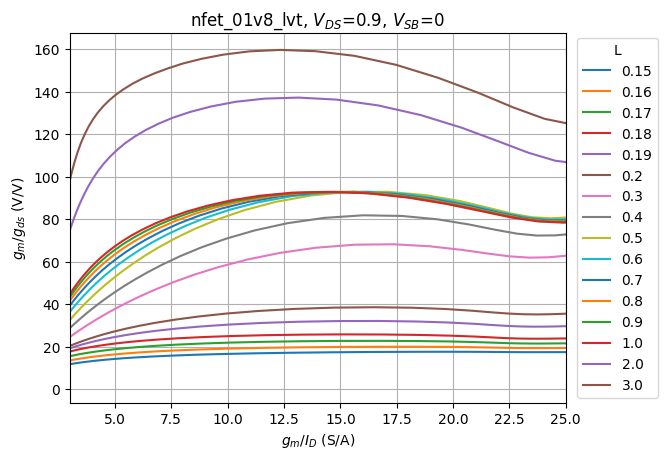

In [19]:
# plot gm/gds versus gm/ID for all L
gm_gds2 = df2['gm'].values/df2['gds'].values
gm_gds2 = np.reshape(gm_gds2, (len(vgs), -1), order='F')

fig, ax = plt.subplots()
ax.plot(gm_id2, gm_gds2)
ax.legend(loc='center right', bbox_to_anchor=(1.2, 0.5), title='L', labels=l.tolist())
plt.xlim(3, 25)
plt.xlabel('$g_m/I_D$ (S/A)')
plt.ylabel('$g_m/g_{ds}$ (V/V)')
plt.title(devices[choice]+', $V_{DS}$='+str(VDS1)+', $V_{SB}$='+str(VSB1))
plt.grid()
plt.show()

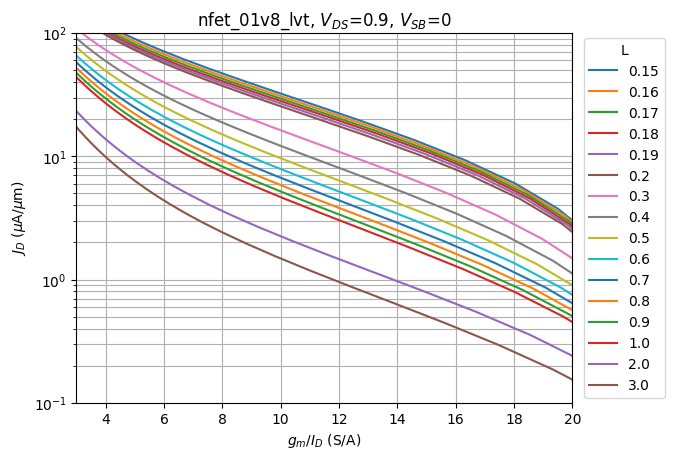

In [20]:
# plot jd versus gm/ID for all L
jd2 = df2['id'].values/w[choice]/1e-6
jd2 = np.reshape(jd2, (len(vgs), -1), order='F')

fig, ax = plt.subplots()
ax.semilogy(gm_id2, jd2)
ax.legend(loc='center right', bbox_to_anchor=(1.2, 0.5), title='L', labels=l.tolist())
plt.xlim(3, 20)
plt.ylim(1e-1, 1e2)
plt.xlabel('$g_m/I_D$ (S/A)')
plt.ylabel('$J_D$ ($\mu$A/$\mu$m)')
plt.grid(which='minor')
plt.grid(which='major')
plt.title(devices[choice]+', $V_{DS}$='+str(VDS1)+', $V_{SB}$='+str(VSB1))
plt.show()